# Simple Analysis of Experimental Data

In [7]:
import os, re
import pandas, numpy
from matplotlib import pyplot

In [8]:
# globals

## Basic Information of Each Experiment

In [9]:
root: str = '../00-data'
file: str = os.listdir(root)
filenamesegs: list[list[str]] = []
F: list[pandas.DataFrame] = []
for f in file:
    F.append(pandas.read_csv(os.path.join(root, f)))
    filenameseg: list[str] = os.path.splitext(f)[0].split('_')
    F[-1]['trial number'] = filenameseg[0]
    F[-1]['browser'] = filenameseg[1]
    F[-1]['push enabled'] = filenameseg[2]
    F[-1]['push freq'] = filenameseg[3]
    if len(filenameseg) > 4:
        F[-1]['push type'] = filenameseg[4]
    else:
        F[-1]['push type'] = ''
    filenamesegs.append(filenameseg)
F.sort(key=lambda F: int(re.search(r'\d+', F['trial number'].iat[0])[0]))
file.sort(key=lambda file: int(re.search(r'\d+', file)[0]))
filenamesegs.sort(key=lambda filenameseg: int(re.search(r'\d+', filenameseg[0])[0]))

summary_table: pandas.DataFrame = pandas.DataFrame(columns=['trial', 'browser', 'push_enabled', 'push_freq', 'push_type', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
for i in range(len(file)):
    summary_table.loc[i] = [F[i]['trial number'].iat[0][len('trial'):], F[i]['browser'].iat[0], F[i]['push enabled'].iat[0], F[i]['push freq'].iat[0], F[i]['push type'].iat[0] if len(filenamesegs[i]) > 4 else '', F[i]['Energy trapz (J)'].mean(), F[i]['Energy trapz (J)'].std(), F[i]['Energy trapz (J)'].min(), F[i]['Energy trapz (J)'].quantile(.25), F[i]['Energy trapz (J)'].quantile(.5), F[i]['Energy trapz (J)'].quantile(.75), F[i]['Energy trapz (J)'].max()]
pandas.set_option('display.width', 65536)
print(summary_table)

   trial  browser push_enabled push_freq push_type        mean       std         min         25%         50%         75%         max
0      1   chrome          off      idle             46.231307  2.426237   35.072987   45.928497   46.741965   47.259847   49.779550
1      2   chrome          off       low      even   48.062190  2.258378   40.902735   46.846682   47.755688   49.694906   52.517839
2      3   chrome          off       low     burst   46.470891  3.662616   31.836826   46.146616   47.540395   48.074592   49.775571
3      4   chrome          off      high      even   57.632000  3.423639   51.963999   55.341675   57.469885   59.927178   66.669379
4      5   chrome          off      high     burst   55.722850  2.122315   51.884041   54.424580   55.193935   56.616161   62.776967
5      6   chrome           on      idle             48.189717  2.522297   37.548153   47.311992   48.392537   49.191719   53.775582
6    7.1   chrome           on       low      even   58.437859  2.805

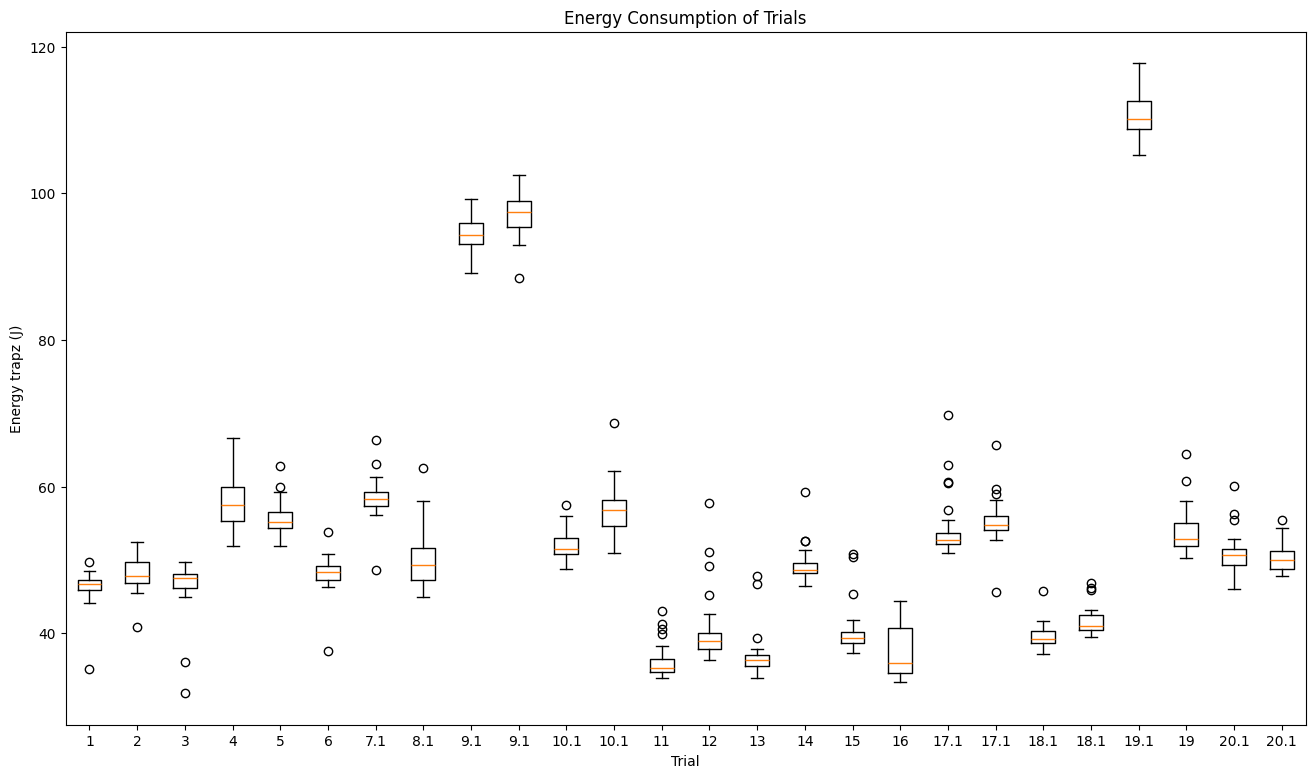

In [10]:
merged_energy_data: list[pandas.Series] = []
for f in F:
    merged_energy_data.append(f['Energy trapz (J)'])

fig, ax = pyplot.subplots(figsize=(16, 9))
ax.set_title('Energy Consumption of Trials')
ax.boxplot(merged_energy_data)
ax.set_xlabel('Trial')
ax.set_ylabel('Energy trapz (J)')
xticklabels: list[str] = []
for filenameseg in filenamesegs:
    xticklabels.append(re.search(r'\d+(.\d)*', filenameseg[0])[0])
ax.set_xticklabels(xticklabels)
pyplot.show()